## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading csv file

In [2]:
raw_data = pd.read_csv("ENB2012_data.csv")

## Data exploration and Preprocessing

In [3]:
raw_data.describe(include="all")

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Dataset does not have any missing values. A total of 768 records. 

In [4]:
raw_data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
raw_data.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

### Corelation

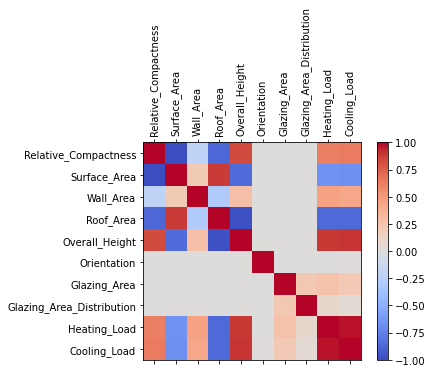

In [6]:
corr = raw_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(raw_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(raw_data.columns)
ax.set_yticklabels(raw_data.columns)
plt.show()

In [7]:
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
raw_data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing_Area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
Glazing_Area_Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


Overall_Height has the highest corelation to Heating_load. According to studies, Results showed that as the height doubles, the wall heat loss for radiator system almost doubles. Other factors such as Roof_area, Surface_Area and Relative_Compactness have a significant value of corelation to Heating_Load.

### Multicollinearity

In [8]:
raw_data.columns.values

array(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype=object)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = raw_data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [10]:
vif

,VIF,features
0,168.95,Relative_Compactness
1,inf,Surface_Area
2,inf,Wall_Area
3,inf,Roof_Area
4,134.04,Overall_Height
5,10.80,Orientation
6,4.29,Glazing_Area
7,4.50,Glazing_Area_Distribution


Since Surface_Area, Wall_Area and Roof_Area have VIF=infinity, it means that they have a perfect correlation thus multicollinearity is present. With respect to heating and cooling load, Roof_Area seems to be more relevant (has a correlation of -0.86 to Heating_Load) thus we choose to retain it.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = raw_data[[ 'Relative_Compactness','Roof_Area','Overall_Height','Orientation',
       'Glazing_Area','Glazing_Area_Distribution']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [12]:
vif

,VIF,features
0,125.51,Relative_Compactness
1,24.35,Roof_Area
2,59.22,Overall_Height
3,10.73,Orientation
4,4.29,Glazing_Area
5,4.49,Glazing_Area_Distribution


### Adjusted R squared

In [13]:
# Model with all features
import statsmodels.formula.api as smf
data2=raw_data.copy()
lm1 = smf.ols(formula='Heating_Load ~ Relative_Compactness + Surface_Area + Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution', data=data2).fit()

In [14]:
# Summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:51:08   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    84.0145     19.034      4.414      0.000      46.650     121.379
Relative_Compactness        -64.7740     10.289     -6.295      0.000     -84.973     -44.575
Surface_Area                 -0.0626      0.013     -4.670      0.000      -0.089      -0.036
Wall_Area                     0.0361      0.004      9.386      0.000       0.029       0.044
Roof_Area                    -0.0494      0.008     -6.569      0.000      -0.064      -0.035
Overall_Height                4.1699      0.338     12.337      0.000       3.506       4.833
Orientation                  -0.0233      0.095     -0.246      0.805      -0.209       0.163
Glazing_Area                 19.9327      0.814     24.488      0.000      18.335      21.531
Glazing_Area_Distribution     0.2038      0.070      2.914      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.648   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.708
Skew:                           0.044   Prob(JB):                     6.48e-09
Kurtosis:                       4.082   Cond. No.                     2.80e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Orientation has a P-value of 0.805 which is greater than 0.05 thus we opt to drop it.

In [15]:
# Model with chosen features
import statsmodels.formula.api as smf
data2=raw_data.copy()
lm2 = smf.ols(formula='Heating_Load ~ Relative_Compactness + Roof_Area + Overall_Height + Glazing_Area + Glazing_Area_Distribution' , data=data2).fit()

In [16]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1656.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:51:08   Log-Likelihood:                -1914.7
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     762   BIC:                             3869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    45.4485      4.186     10.859      0.000      37.232      53.665
Relative_Compactness        -43.8717      2.049    -21.410      0.000     -47.894     -39.849
Roof_Area                    -0.1080      0.012     -9.336      0.000      -0.131      -0.085
Overall_Height                4.6105      0.263     17.518      0.000       4.094       5.127
Glazing_Area                 19.9327      0.815     24.450      0.000      18.332      21.533
Glazing_Area_Distribution     0.2038      0.070      2.910      0.004       0.066       0.341
==============================================================================
Omnibus:                       17.358   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.700
Skew:                           0.051   Prob(JB):                     4.81e-08
Kurtosis:                       4.021   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value of adjusted R squared is retained at 0.915. Removing any other features results to a penalty. 

### Normalizing

In [17]:
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = raw_data[['Relative_Compactness','Roof_Area','Overall_Height', 'Glazing_Area','Glazing_Area_Distribution']]
X = nr.fit_transform(X)
Y = raw_data[['Heating_Load','Cooling_Load']]

## Modelling

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 365)

In [19]:
#Create model evaluation function
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score


### 1.Decision tree regressor

In [20]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=365)
# Apply the model
dt_model.fit(x_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(x_test)
#R2 score before optimization
R2_before_dt= evaluate(dt_model, x_test, y_test)

R2 score = 0.976


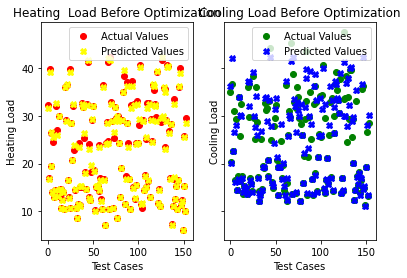

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

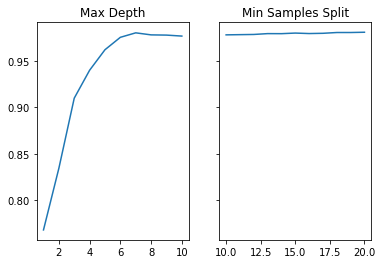

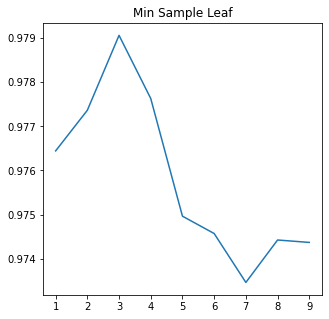

In [22]:
# Finding the best decision tree optimization parameters

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt.fit(x_train, y_train)
    dt_acc.append(dt.score(x_test, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min Samples Split
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=365, min_samples_split=i)
    dt.fit(x_train, y_train)
    dt_acc.append(dt.score(x_test, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

#Min Sample Leaf
plt.figure(figsize = (5,5))
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=365, min_samples_leaf=i)
    dt.fit(x_train, y_train)
    dt_acc.append(dt.score(x_test, y_test))

plt.plot(dt_samples_leaf,dt_acc)
plt.title('Min Sample Leaf')



plt.show()

In [23]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6,7,8],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [2,3,4]}


#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=365),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [16, 17, 18]})

In [24]:
#View the best parameters
dt_random.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 18}

In [25]:
# Predicted value
y_pred1_ = dt_random.best_estimator_.predict(x_test)

In [26]:
#R2 score after optimization
dt_best_random = dt_random.best_estimator_
R2_after_dt= evaluate(dt_best_random, x_test, y_test)

R2 score = 0.980


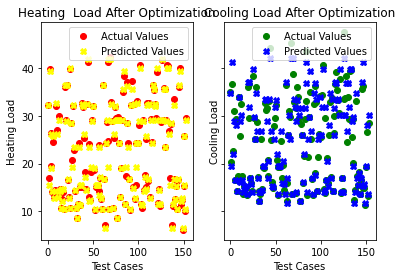

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred1_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred1_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

### 2.Random forest regressor

In [28]:
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create random forest model 
rf_model = RandomForestRegressor(random_state=365)
# Apply the model
rf_model.fit(x_train, y_train)
# Predicted value
y_pred2 = rf_model.predict(x_test)
#R2 score before optimization
R2_before_rf= evaluate(rf_model, x_test, y_test)

R2 score = 0.978


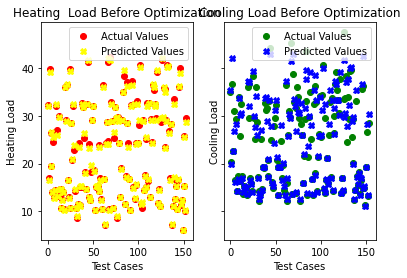

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred2[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred2[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

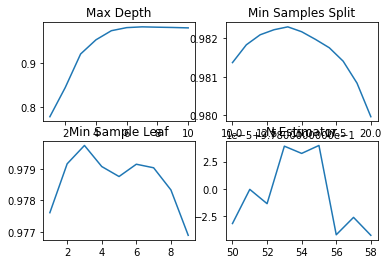

In [30]:
# Finding the best random forest optimization parameters

f, axarr = plt.subplots(2, 2)

# Max Depth
rf_acc = []
rf_depth = range(1,11)
for i in rf_depth:
    rf = RandomForestRegressor(random_state=365, max_depth=i)
    rf.fit(x_train, y_train)
    rf_acc.append(rf.score(x_test, y_test))
axarr[0, 0].plot(rf_depth,rf_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
rf_acc = []
rf_samples_split = range(10,21)
for i in rf_samples_split:
    rf = RandomForestRegressor(random_state=365, min_samples_split=i)
    rf.fit(x_train, y_train)
    rf_acc.append(rf.score(x_test, y_test))
axarr[0, 1].plot(rf_samples_split,rf_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
rf_acc = []
rf_samples_leaf = range(1,10)
for i in rf_samples_leaf:
    rf = RandomForestRegressor(random_state=365, min_samples_leaf=i)
    rf.fit(x_train, y_train)
    rf_acc.append(rf.score(x_test, y_test))

axarr[1, 0].plot(rf_samples_leaf,rf_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=365, n_estimators=i)
    rf.fit(x_train, y_train)
    rf_acc.append(rf.score(x_test, y_test))

axarr[1, 1].plot(rf_estimators,rf_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [31]:
# Random forest optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6,7,8],
              'min_samples_split': [12,13,14],
              'min_samples_leaf' : [2,3,4],
              'n_estimators': [53,54,55]}


#Create new model using the GridSearch
rf_random = GridSearchCV(rf_model, parameters, cv=10)

#Apply the model
rf_random.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=365),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [12, 13, 14],
                         'n_estimators': [53, 54, 55]})

In [32]:
#View the best parameters
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 54}

In [33]:
# Predicted value
y_pred2_ = rf_random.best_estimator_.predict(x_test)
#R2 score after optimization
best_random_rf = rf_random.best_estimator_
R2_after_rf= evaluate(best_random_rf, x_test, y_test)

R2 score = 0.982


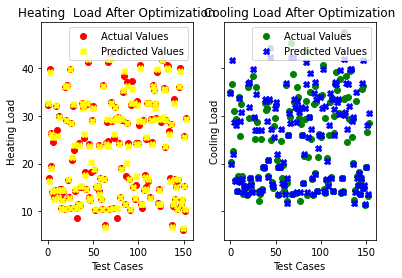

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred2_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred2_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

### 3.Extra trees Regressor

In [35]:
#Import extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
# Create extra trees model 
etr_model = ExtraTreesRegressor(random_state=123)
# Apply the model
etr_model.fit(x_train, y_train)
# Predicted value
y_pred3 = etr_model.predict(x_test)
#R2 score before optimization
R2_before_etr= evaluate(etr_model, x_test, y_test)

R2 score = 0.976


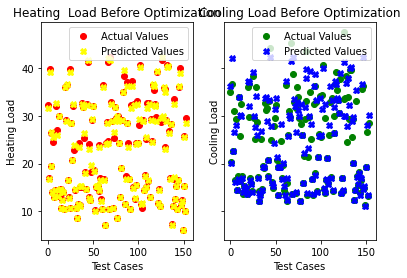

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred3[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred3[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

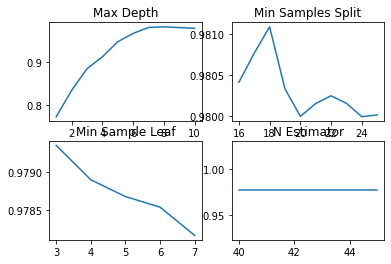

In [37]:
# Finding the best extra trees regressor optimization parameters

f, axarr = plt.subplots(2, 2)

# Max Depth
etr_acc = []
etr_depth = range(1,11)
for i in etr_depth:
    etr = ExtraTreesRegressor(random_state=123, max_depth=i)
    etr.fit(x_train, y_train)
    etr_acc.append(etr.score(x_test, y_test))
axarr[0, 0].plot(etr_depth,etr_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
etr_acc = []
etr_samples_split = range(16,26)
for i in etr_samples_split:
    etr = ExtraTreesRegressor(random_state=365, min_samples_split=i)
    etr.fit(x_train, y_train)
    etr_acc.append(etr.score(x_test, y_test))
axarr[0, 1].plot(etr_samples_split,etr_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
etr_acc = []
etr_samples_leaf = range(3,8)
for i in etr_samples_leaf:
    etr = ExtraTreesRegressor(random_state=365, min_samples_leaf=i)
    etr.fit(x_train, y_train)
    etr_acc.append(etr.score(x_test, y_test))

axarr[1, 0].plot(etr_samples_leaf,etr_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
etr_acc = []
etr_estimators = range(40,46)
for i in etr_estimators:
    etr = ExtraTreesRegressor(random_state=365, n_estimators=i)
    etr.fit(x_train, y_train)
    etr_acc.append(etr.score(x_test, y_test))

axarr[1, 1].plot(etr_estimators,etr_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [38]:
# Extra trees regressor optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [7,8,9],
              'min_samples_split': [17,18,19],
              'min_samples_leaf' : [3,4,5],
              'n_estimators': [41,42,43]}


#Create new model using the GridSearch
etr_random = GridSearchCV(etr_model, parameters, cv=10)

#Apply the model
etr_random.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=123),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [17, 18, 19],
                         'n_estimators': [41, 42, 43]})

In [39]:
#View the best parameters
etr_random.best_params_

{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 17,
 'n_estimators': 43}

In [40]:
# Predicted value
y_pred3_ = etr_random.best_estimator_.predict(x_test)
#R2 score after optimization
best_random_etr = etr_random.best_estimator_
R2_after_etr= evaluate(best_random_etr, x_test, y_test)

R2 score = 0.978


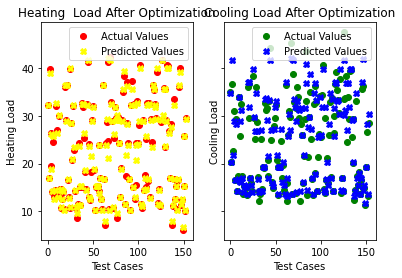

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(x_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(x_test)),y_pred3_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(x_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(x_test)),y_pred3_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

## Choosing a model

Overall, the model perform well to predict the the Heating Load and Cooling Load with R2 score >= 97% even not using hyperparameter optimization

R2 score of Decision Tree Regressor model = 97.6%

R2 score of Random Forest Regressor model = 97.8%

R2 score of Extra Trees Regressor model = 97.6%

To increase the F1 score, we have applied hyperparameter tuning using GridSearch and obtain

R2 score of Decision Tree Regressor model = 98.0%

R2 score of Random Forest Regressor model = 98.2%

R2 score of Extra Trees Regressor model = 97.8%

We can conclude that Random Forest Regressor is the best model to predict the Heating Load and Cooling Load values with the optimum R2 score of 98.2%

## References

1. https://www.researchgate.net/publication/252422007_Effect_of_Building_Height_on_Energy_Consumption_of_Radiator_and_Floor_Heating_Systems
2. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea#:~:text=When%20independent%20variables%20are%20highly,in%20the%20data%20or%20model.
3. https://jes.ut.ac.ir/article_72074.html?lang=en#:~:text=In%20general%2C%20as%20the%20relative,load%20and%20Co2%20emission%20decrease.
4. https://www.kaggle.com/busthon/multiple-regression-on-energy-efficiency/notebook